# US AIR TRAFFIC ANALYSIS 2022

## Data Information
 - **Data Source:** US Bureau of Transport Statistics [[Direct Link]](https://www.bts.gov/) <br />
 - **Database Name:** Airline On-Time Performance Data [[Direct Link]](https://transtats.bts.gov/DatabaseInfo.asp?QO_VQ=EFD&Yv0x=D)<br />
 - **Frequency:** Monthly <br />
 - **Coverage:** US certified air carriers that account for at least one percent of domestic scheduled passenger revenues <br />
 - **URL:** [[URL]](https://transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGK&QO_fu146_anzr=b0-gvzr) <br />
 - **+** "Documentation.csv" contains information about each varaible in the dataset
 - **+** Data from December is not available 


## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 400
plt.rcParams["figure.figsize"] = (6, 5)
%matplotlib inline

In [2]:
# Mergin all datasets
initial_df = pd.concat(map(pd.read_csv, ["M1.csv","M2.csv","M3.csv","M4.csv","M5.csv","M6.csv","M7.csv","M8.csv","M9.csv","M10.csv","M11.csv"]))

# Importing dataset
# initial_df = pd.read_csv('Total11.csv')

In [3]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435187 entries, 0 to 567506
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   YEAR                int64  
 1   QUARTER             int64  
 2   MONTH               int64  
 3   DAY_OF_MONTH        int64  
 4   MKT_UNIQUE_CARRIER  object 
 5   OP_UNIQUE_CARRIER   object 
 6   ORIGIN_AIRPORT_ID   int64  
 7   ORIGIN              object 
 8   DEST_AIRPORT_ID     int64  
 9   DEST                object 
 10  DEP_DEL15           float64
 11  ARR_DEL15           float64
 12  CANCELLED           float64
 13  DIVERTED            float64
 14  AIR_TIME            float64
 15  FLIGHTS             float64
dtypes: float64(6), int64(6), object(4)
memory usage: 834.6+ MB


In [4]:
initial_df.shape

(6435187, 16)

In [5]:
initial_df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'MKT_UNIQUE_CARRIER',
       'OP_UNIQUE_CARRIER', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID',
       'DEST', 'DEP_DEL15', 'ARR_DEL15', 'CANCELLED', 'DIVERTED', 'AIR_TIME',
       'FLIGHTS'],
      dtype='object')

In [6]:
initial_df.isna().sum()

# DEP_DEP15 and ARR_DEL15 only appears if the flight has been delayed, so missing values are expected.
# AIR_TIME is a variable with missing values, inputing data may not be and option

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
MKT_UNIQUE_CARRIER         0
OP_UNIQUE_CARRIER          0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
DEP_DEL15             155052
ARR_DEL15             174148
CANCELLED                  0
DIVERTED                   0
AIR_TIME              174148
FLIGHTS                    0
dtype: int64

In [7]:
# Missing Data percentages

print("Total invalid data from column DEP_DEL15 is: {}".format(initial_df.DEP_DEL15.isna().sum() / len(initial_df.DEP_DEL15) * 100))
print("Total invalid data from column ARR_DEL15 is: {}".format(initial_df.ARR_DEL15.isna().sum() / len(initial_df.ARR_DEL15) * 100))
print("Total invalid data from column AIR_TIME is: {}".format(initial_df.AIR_TIME.isna().sum() / len(initial_df.AIR_TIME) * 100))

Total invalid data from column DEP_DEL15 is: 2.4094404715822555
Total invalid data from column ARR_DEL15 is: 2.706183985018617
Total invalid data from column AIR_TIME is: 2.706183985018617


In [8]:
# Splitting Dataset
numeric = initial_df.select_dtypes(include=['int64','float64'])
categorical = initial_df.select_dtypes(include=['object'])

In [9]:
numeric.tail(n=10)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DEL15,ARR_DEL15,CANCELLED,DIVERTED,AIR_TIME,FLIGHTS
567497,2022,4,11,30,15376,11292,0.0,0.0,0.0,0.0,81.0,1.0
567498,2022,4,11,30,15376,11292,0.0,0.0,0.0,0.0,82.0,1.0
567499,2022,4,11,30,15376,12191,0.0,0.0,0.0,0.0,110.0,1.0
567500,2022,4,11,30,15376,12889,0.0,0.0,0.0,0.0,53.0,1.0
567501,2022,4,11,30,15376,12889,0.0,0.0,0.0,0.0,53.0,1.0
567502,2022,4,11,30,15376,12889,0.0,0.0,0.0,0.0,56.0,1.0
567503,2022,4,11,30,15376,12892,0.0,0.0,0.0,0.0,70.0,1.0
567504,2022,4,11,30,15376,12892,0.0,0.0,0.0,0.0,74.0,1.0
567505,2022,4,11,30,15376,14679,1.0,1.0,0.0,0.0,57.0,1.0
567506,2022,4,11,30,15624,11259,0.0,0.0,0.0,0.0,101.0,1.0


In [10]:
categorical.tail(n=10)

,MKT_UNIQUE_CARRIER,OP_UNIQUE_CARRIER,ORIGIN,DEST
567497,WN,WN,TUS,DEN
567498,WN,WN,TUS,DEN
567499,WN,WN,TUS,HOU
567500,WN,WN,TUS,LAS
567501,WN,WN,TUS,LAS
567502,WN,WN,TUS,LAS
567503,WN,WN,TUS,LAX
567504,WN,WN,TUS,LAX
567505,WN,WN,TUS,SAN
567506,WN,WN,VPS,DAL


### Numerical Exploration

In [11]:
# Setting plotting functions
 
def barp(x,y,t='None',xl='None',yl='None',rotationx=0,rotationa=0,an=False,mean=False,cor=False):

    plt.bar(x,y,color='c') # Initializing the graph
    plt.title(str(t)) # Title
    plt.xlabel(str(xl)) # x_title
    plt.ylabel(str(yl)) # y_title
    plt.ticklabel_format(style='plain',axis='y')
    if cor:
        y_pos = np.arange(len(df))+1 # Setting the y-postion for xticks
        plt.xticks(y_pos,x) # Setting the xticks
    else:
        y_pos = np.arange(len(df)) # Setting the y-postion for xticks
        plt.xticks(y_pos,x) # Setting the xticks
    if an: # evaluating if anotations are requiered 
        for i in range(len(x)):
            plt.text(i, y[i], y[i], ha = 'center',rotation=rotationa) # Setting annotations individually 
    if rotationx != 0: # evaluating if rotation of the annotations are requiered
        plt.xticks(rotation=rotationx) # rotation
    if mean: # evaluating if a mean calculation and plotting is requiered
        plt.axhline(y=np.nanmean(y),color='red', linestyle='--', linewidth=1.5, label='Avg') # calculation and plotting
        plt.legend(bbox_to_anchor=(1.0, 0.5), loc='center left',ncol=1)
        #plt.legend(bbox_to_anchor=(1.0, 0.5)) # setting legends and labels
        
    plt.show()


def linep(x,y,t='None',xl='None',yl='None',rotationx=0,rotationa=0,an=False,mean=False,yax=[0,0],cor=False):

    y_pos = np.arange(len(df))
    plt.plot(x,y,color='c') 
    plt.title(str(t))
    plt.xlabel(str(xl))
    plt.ylabel(str(yl))
    plt.xticks(y_pos,x)
    plt.ticklabel_format(style='plain',axis='y')
    if an:  
        for i in range(len(x)):
            plt.text(i, y[i], y[i], ha = 'center',rotation=rotationa) 
    if rotationx != 0:
        plt.xticks(rotation=rotationx)
    if mean:
        plt.axhline(y=np.nanmean(y),color='red', linestyle='--', linewidth=1.5, label='Avg')
        plt.legend(bbox_to_anchor=(1.0, 0.5), loc='center left',ncol=1)
    if yax[1]!=0:
        plt.ylim(yax[0],yax[1])
    if cor:
        y_pos = np.arange(len(df)) # Setting the y-postion for xticks
        plt.xticks(y_pos,x) # Setting the xticks
    else:
        y_pos = np.arange(len(df))+1 # Setting the y-postion for xticks
        plt.xticks(y_pos,x) # Setting the xticks
    plt.show()

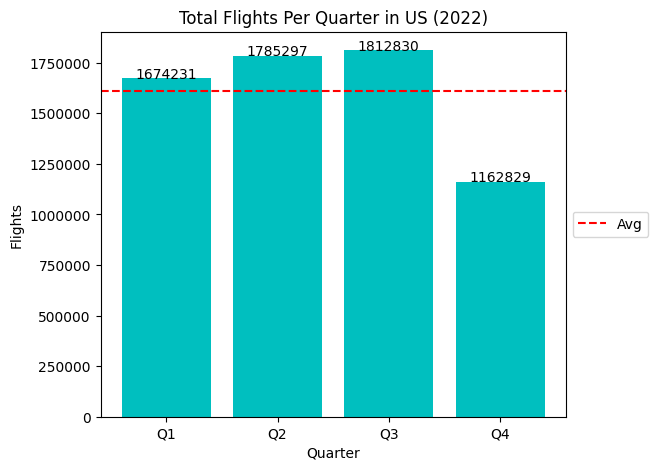

In [12]:
# Exploration by Quarters

df = numeric.groupby('QUARTER')['FLIGHTS'].sum().to_frame().reset_index().astype('int')
df.QUARTER = df.QUARTER.replace([1,2,3,4],["Q1","Q2","Q3","Q4"])

barp(df['QUARTER'],df['FLIGHTS'],
     t='Total Flights Per Quarter in US (2022)',
     xl='Quarter',
     yl='Flights',
     rotationa=0,
     rotationx=0,
     an=True,
     mean=True,
     cor=False)

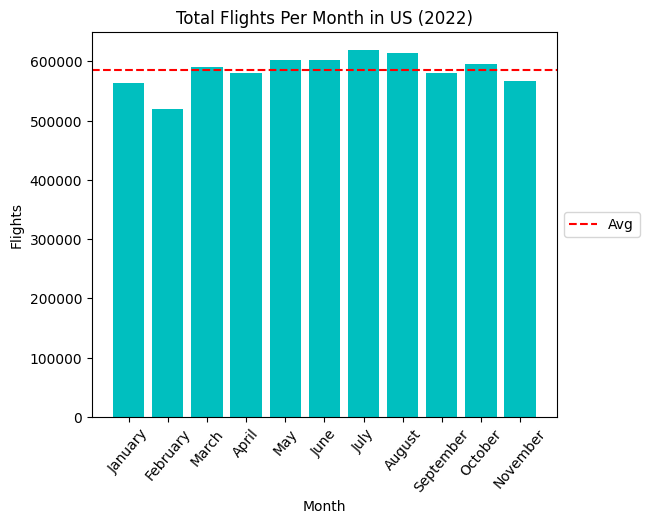

In [13]:
# Exploration by Month

df = numeric.groupby('MONTH')['FLIGHTS'].sum().to_frame().reset_index().astype('int')
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
df.MONTH = df['MONTH'].replace(list(range(1,13)),Months)

barp(df['MONTH'],df['FLIGHTS'],
     t='Total Flights Per Month in US (2022)',
     xl='Month',
     yl='Flights',
     rotationx=50,
     mean=True)

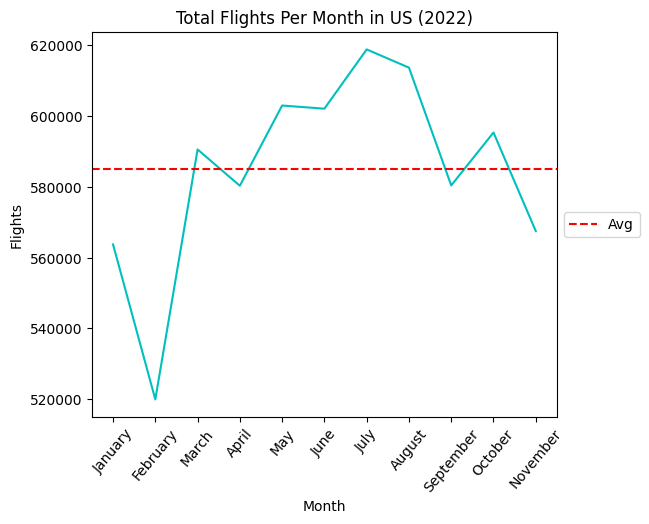

In [14]:
linep(df['MONTH'],df['FLIGHTS'],
     t='Total Flights Per Month in US (2022)',
     xl='Month',
     yl='Flights',
     rotationx=50,
     an=False,
     mean=True,
     cor=True)

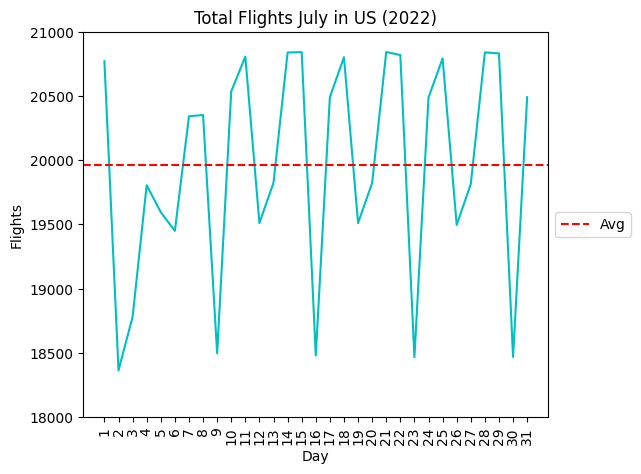

In [15]:
# July show the maximum reported value for this year.
# In-Depth July

df = numeric.groupby(['MONTH','DAY_OF_MONTH'])['FLIGHTS'].sum().to_frame().reset_index().astype('int')
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
df.MONTH = df['MONTH'].replace(list(range(1,13)),Months)
df = df[df['MONTH']=='July']

linep(df['DAY_OF_MONTH'],df['FLIGHTS'],
     t='Total Flights July in US (2022)',
     xl='Day',
     yl='Flights',
     rotationx=90,
     mean=True,
     yax=[18000,21000],
     cor=False)

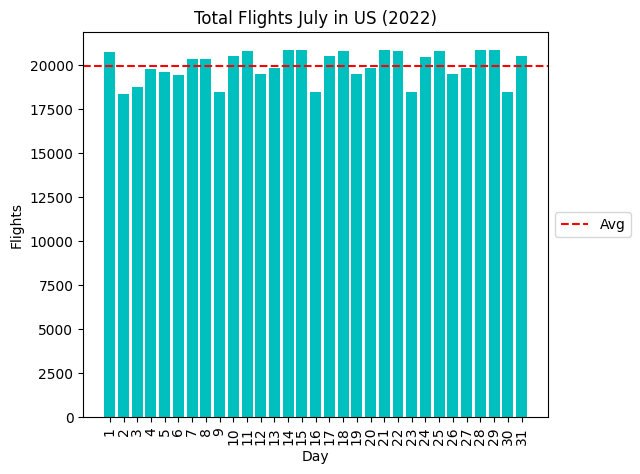

In [16]:
barp(df['DAY_OF_MONTH'],df['FLIGHTS'],
     t='Total Flights July in US (2022)',
     xl='Day',
     yl='Flights',
     rotationx=90,
     mean=True,
     cor=True)

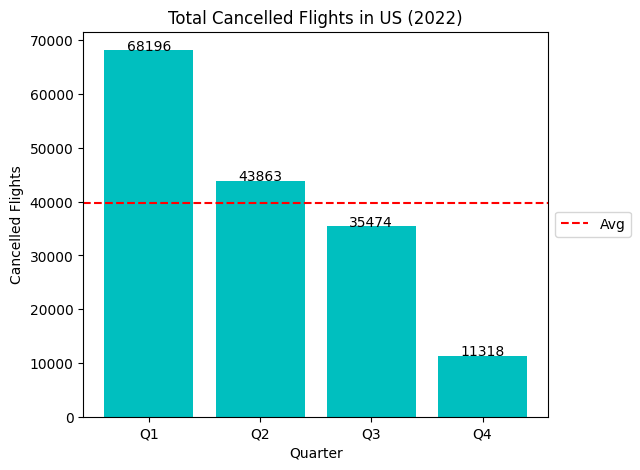

In [17]:
# Cancelled flights in US

df = numeric.groupby('QUARTER')[['CANCELLED','DIVERTED']].sum().reset_index().astype('int')
df.QUARTER = df.QUARTER.replace([1,2,3,4],["Q1","Q2","Q3","Q4"])

barp(df['QUARTER'],df['CANCELLED'],
     t='Total Cancelled Flights in US (2022)',
     xl='Quarter',
     yl='Cancelled Flights',
     an=True,
     mean=True)

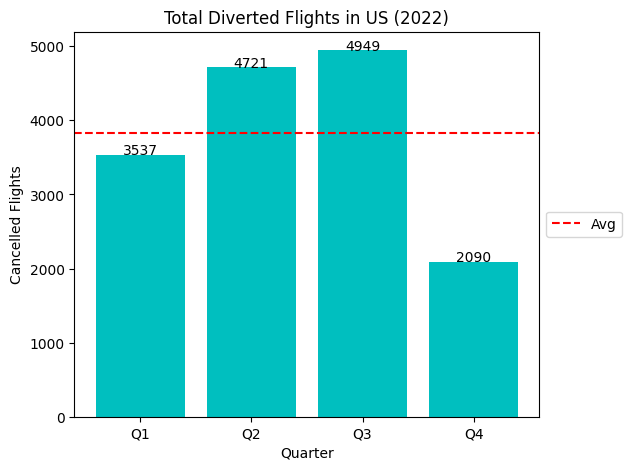

In [18]:
# Diverted flights in US

barp(df['QUARTER'],df['DIVERTED'],
     t='Total Diverted Flights in US (2022)',
     xl='Quarter',
     yl='Cancelled Flights',
     an=True,
     mean=True,
     cor=False)

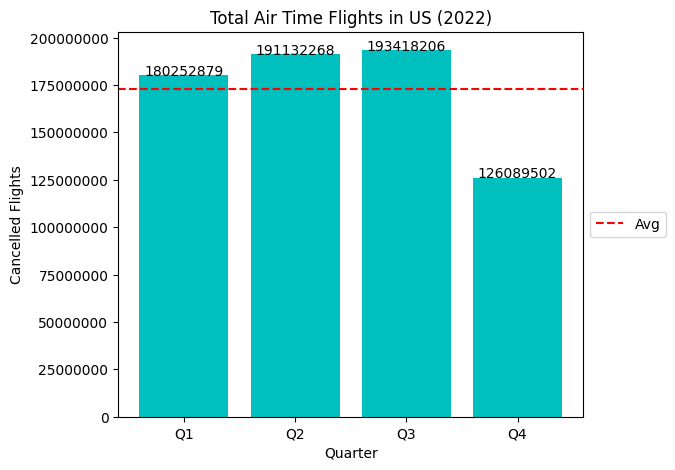

In [19]:
# Exploration of total flight time per quarter

df = numeric.groupby('QUARTER')['AIR_TIME'].sum().reset_index().astype('int')
df.QUARTER = df.QUARTER.replace([1,2,3,4],["Q1","Q2","Q3","Q4"])

barp(df['QUARTER'],df['AIR_TIME'],
     t='Total Air Time Flights in US (2022)',
     xl='Quarter',
     yl='Cancelled Flights',
     an=True,
     mean=True)

### Categorical Exploration

In [20]:
for i in categorical.columns:
    print('*'*10,i,'*'*10)
    print('Total Unique Values: ',len(categorical[i].unique()))

********** MKT_UNIQUE_CARRIER **********
Total Unique Values:  10
********** OP_UNIQUE_CARRIER **********
Total Unique Values:  21
********** ORIGIN **********
Total Unique Values:  375
********** DEST **********
Total Unique Values:  376


In [21]:
# Modifying the dataset and replacing values

df = categorical.groupby('OP_UNIQUE_CARRIER')['OP_UNIQUE_CARRIER'].count().reset_index(name='Counts')
ar_codes = {
    "ZW":"Air Wisconsin",
    "AS":"Alaska Airlines",
    "G4":"Allegiant Air LLC ",
    "AA":"American Airlines",
    "C5":"Champlain Air",
    "CP":"Compass Airlines",
    "DL":"Delta Air Lines, Inc.",
    "EM":"Empire Airline",
    "9E":"Endeavor Air", 
    "MQ":"Envoy Air",
    "EV":"ExpressJet Airlines", 
    "F9":"Frontier Airlines, Inc.", 
    "G7":"GoJet Airlines",
    "HA":"Hawaiian Airlines Inc.",
    "QX":"Horizon Air",
    "B6":"Jetblue Airways Corporation",
    "OH":"Jetstream Intl",
    "YV":"Mesa Airlines, Inc.",
    "KS":"Penair",
    "PT":"Piedmont Airlines",
    "YX":"Republic Airlines",
    "OO":"Skywest Airlines",
    "WN":"Southwest Airlines",
    "NK":"Spirit Airlines, Inc.",
    "AX":"Trans State",
    "UA":"United Airlines, Inc."
}
df.OP_UNIQUE_CARRIER = df.OP_UNIQUE_CARRIER.replace(list(ar_codes.keys()),list(ar_codes.values()))

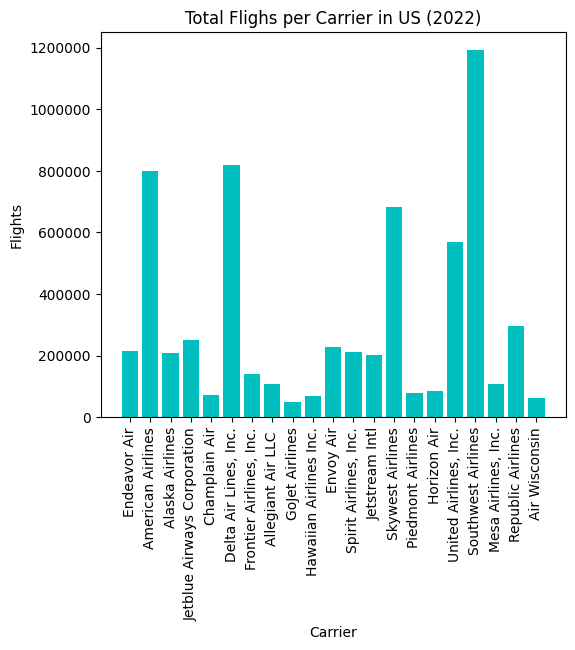

In [22]:
# Carrier analysis

barp(df['OP_UNIQUE_CARRIER'],df['Counts'],
     t='Total Flighs per Carrier in US (2022)',
     xl='Carrier',
     yl='Flights',
     rotationx=90)

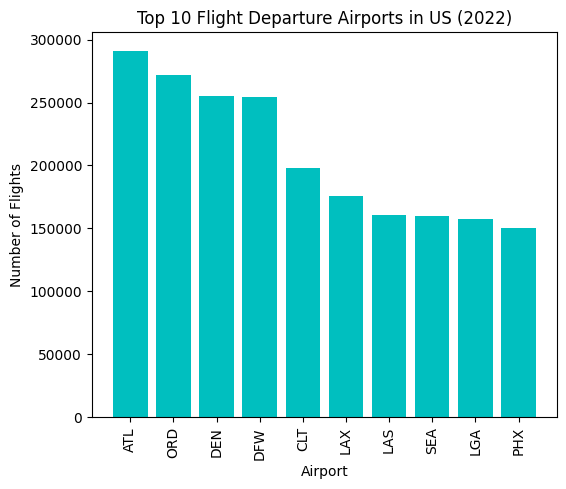

In [23]:
# Departure Airport Analysis
df = categorical.groupby('ORIGIN')['OP_UNIQUE_CARRIER'].count().reset_index(name='Counts')
df = df.nlargest(10,columns='Counts') # Top 10 departure/origin airports in US

barp(df['ORIGIN'],df['Counts'],
     t='Top 10 Flight Departure Airports in US (2022)',
     xl='Airport',
     yl='Number of Flights',
     rotationx=90)

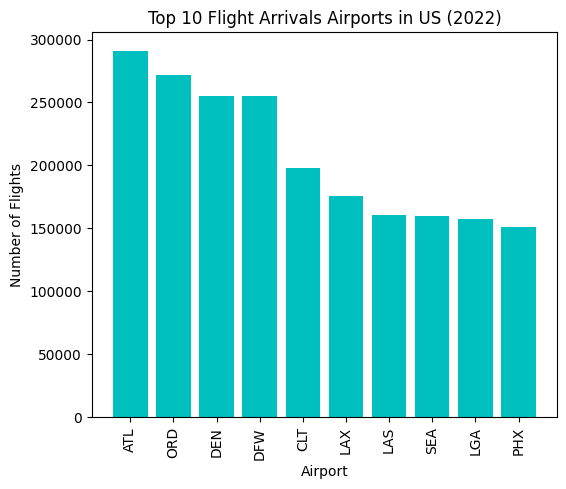

In [24]:
# Arrivals Airpots Analysis 

df = categorical.groupby('DEST')['OP_UNIQUE_CARRIER'].count().reset_index(name='Counts')
df = df.nlargest(10,columns='Counts') # Top 10 arrivals/destiny airports in US

barp(df['DEST'],df['Counts'],
     t='Top 10 Flight Arrivals Airports in US (2022)',
     xl='Airport',
     yl='Number of Flights',
     rotationx=90)

In [25]:
### Obtaining airport names via webscrapping

import requests
from bs4 import BeautifulSoup

page = requests.get('https://en.wikipedia.org/wiki/List_of_airports_in_the_United_States').text
soup = BeautifulSoup(page,'lxml')

### Finding table
dtable = soup.find('table',class_='wikitable sortable')

### Building dataset

headers = []
for i in dtable.find_all('th'):
    title = i.text
    headers.append(title)
faa_codes = pd.DataFrame(columns=headers)

### Iterating over rows

for j in dtable.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [i.text for i in row_data]
    lenght = len(faa_codes)
    faa_codes.loc[lenght] = row

faa_codes.head(n=5)

,City,FAA,IATA,ICAO,Airport,Role,Enplanements\n
0,ALABAMA,,,,,,\n
1,Birmingham\n,BHM\n,BHM\n,KBHM\n,Birmingham–Shuttlesworth International Airport\n,P-S\n,"1,081,328\n"
2,Dothan\n,DHN\n,DHN\n,KDHN\n,Dothan Regional Airport\n,P-N\n,"37,047\n"
3,Huntsville\n,HSV\n,HSV\n,KHSV\n,Huntsville International Airport (Carl T. Jone...,P-S\n,"459,759\n"
4,Mobile\n,MOB\n,MOB\n,KMOB\n,Mobile Regional Airport\n,P-N\n,"236,007\n"


In [26]:
### Selecting and Filtering only requiered/valid entries

faa_codes = faa_codes[['City','FAA']]
faa_codes = faa_codes[faa_codes.FAA!='']
faa_codes = faa_codes.replace('\n','',regex=True)
faa_codes.head(n=5)

,City,FAA
1,Birmingham,BHM
2,Dothan,DHN
3,Huntsville,HSV
4,Mobile,MOB
5,Montgomery,MGM


In [27]:
### Merge Airport data via FAA code

df = categorical.groupby('DEST')['OP_UNIQUE_CARRIER'].count().reset_index(name='Counts')
df_dest= df.merge(faa_codes,left_on='DEST',right_on='FAA').drop(['FAA'],axis=1)
df = categorical.groupby('ORIGIN')['OP_UNIQUE_CARRIER'].count().reset_index(name='Counts')
df_ori = df.merge(faa_codes,left_on='ORIGIN',right_on='FAA').drop(['FAA'],axis=1)

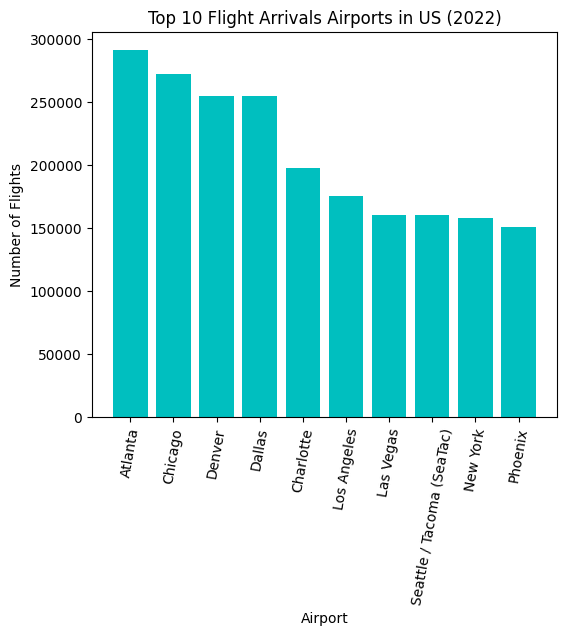

In [28]:
# New Graphics

df = df_dest.nlargest(10,columns='Counts') # Top 10 departure/origin airports in US
barp(df['City'],df['Counts'],
     t='Top 10 Flight Arrivals Airports in US (2022)',
     xl='Airport',
     yl='Number of Flights',
     rotationx=80)

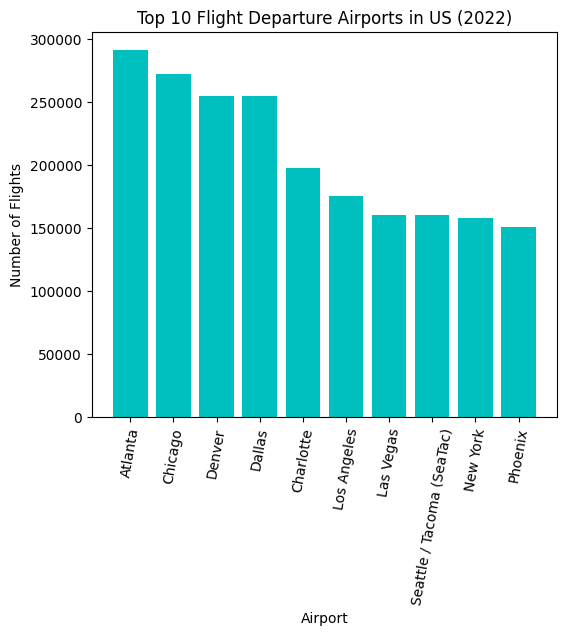

In [29]:
df = df_ori.nlargest(10,columns='Counts') # Top 10 arrivals/destiny airports in US

barp(df['City'],df['Counts'],
     t='Top 10 Flight Departure Airports in US (2022)',
     xl='Airport',
     yl='Number of Flights',
     rotationx=80)

## Analysis by Carrier

In [30]:
df = initial_df[['YEAR','QUARTER','MONTH','OP_UNIQUE_CARRIER','CANCELLED','DIVERTED']]
df.head(n=5)

,YEAR,QUARTER,MONTH,OP_UNIQUE_CARRIER,CANCELLED,DIVERTED
0,2022,1,1,AA,0.0,0.0
1,2022,1,1,AA,0.0,0.0
2,2022,1,1,AA,0.0,0.0
3,2022,1,1,AA,0.0,0.0
4,2022,1,1,AA,0.0,0.0


In [31]:
# Replacing values in dataset

ar_codes = {
    "ZW":"Air Wisconsin",
    "AS":"Alaska Airlines",
    "G4":"Allegiant Air LLC ",
    "AA":"American Airlines",
    "C5":"Champlain Air",
    "CP":"Compass Airlines",
    "DL":"Delta Air Lines, Inc.",
    "EM":"Empire Airline",
    "9E":"Endeavor Air", 
    "MQ":"Envoy Air",
    "EV":"ExpressJet Airlines", 
    "F9":"Frontier Airlines, Inc.", 
    "G7":"GoJet Airlines",
    "HA":"Hawaiian Airlines Inc.",
    "QX":"Horizon Air",
    "B6":"Jetblue Airways Corporation",
    "OH":"Jetstream Intl",
    "YV":"Mesa Airlines, Inc.",
    "KS":"Penair",
    "PT":"Piedmont Airlines",
    "YX":"Republic Airlines",
    "OO":"Skywest Airlines",
    "WN":"Southwest Airlines",
    "NK":"Spirit Airlines, Inc.",
    "AX":"Trans State",
    "UA":"United Airlines, Inc."
}
df = df.groupby(['OP_UNIQUE_CARRIER','MONTH'])[["CANCELLED",'DIVERTED']].sum().reset_index()
df.OP_UNIQUE_CARRIER = df.OP_UNIQUE_CARRIER.replace(list(ar_codes.keys()),list(ar_codes.values()))
df.head(n=5)

,OP_UNIQUE_CARRIER,MONTH,CANCELLED,DIVERTED
0,Endeavor Air,1,1346.0,39.0
1,Endeavor Air,2,771.0,22.0
2,Endeavor Air,3,341.0,61.0
3,Endeavor Air,4,209.0,27.0
4,Endeavor Air,5,624.0,35.0


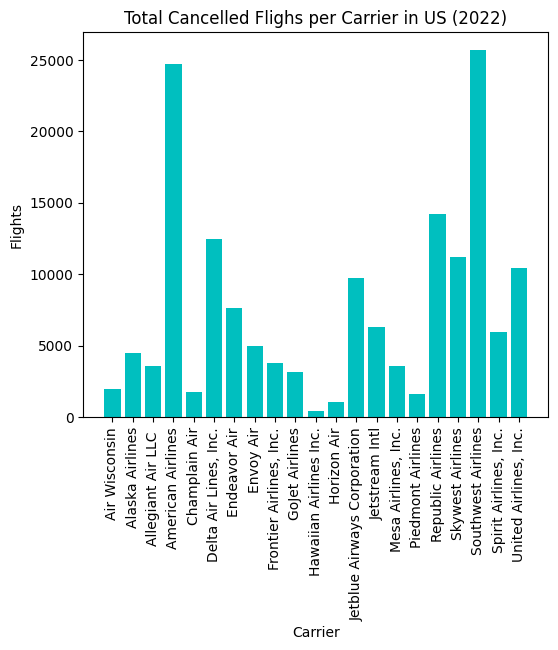

In [32]:
df = df.groupby('OP_UNIQUE_CARRIER')[["CANCELLED",'DIVERTED']].sum().reset_index()
barp(df['OP_UNIQUE_CARRIER'],df['CANCELLED'],
     t='Total Cancelled Flighs per Carrier in US (2022)',
     xl='Carrier',
     yl='Flights',
     rotationx=90)

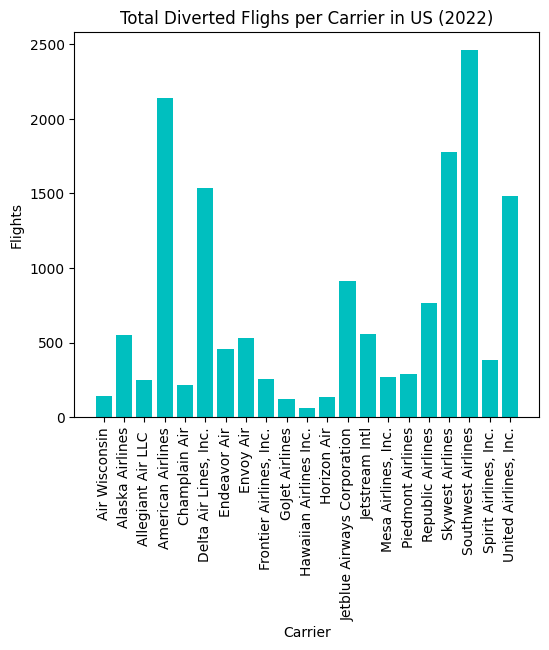

In [33]:
barp(df['OP_UNIQUE_CARRIER'],df['DIVERTED'],
     t='Total Diverted Flighs per Carrier in US (2022)',
     xl='Carrier',
     yl='Flights',
     rotationx=90)

## Interactive Web App can be found in **App.py**

In [ ]:
import pandas as pd
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Reading the dataframe

initial_df = pd.read_csv('Total11.csv')
initial_df.drop(columns=['Unnamed: 0'],inplace=True)
numeric = initial_df.select_dtypes(include=['int64','float64'])
categorical = initial_df.select_dtypes(include=['object'])
ar_codes = {
    "ZW":"Air Wisconsin",
    "AS":"Alaska Airlines",
    "G4":"Allegiant Air LLC ",
    "AA":"American Airlines",
    "C5":"Champlain Air",
    "CP":"Compass Airlines",
    "DL":"Delta Air Lines, Inc.",
    "EM":"Empire Airline",
    "9E":"Endeavor Air", 
    "MQ":"Envoy Air",
    "EV":"ExpressJet Airlines", 
    "F9":"Frontier Airlines, Inc.", 
    "G7":"GoJet Airlines",
    "HA":"Hawaiian Airlines Inc.",
    "QX":"Horizon Air",
    "B6":"Jetblue Airways Corporation",
    "OH":"Jetstream Intl",
    "YV":"Mesa Airlines, Inc.",
    "KS":"Penair",
    "PT":"Piedmont Airlines",
    "YX":"Republic Airlines",
    "OO":"Skywest Airlines",
    "WN":"Southwest Airlines",
    "NK":"Spirit Airlines, Inc.",
    "AX":"Trans State",
    "UA":"United Airlines, Inc."
}

#### Plotting Graphs ####

def bar_q():
    df = numeric.groupby('QUARTER')['FLIGHTS'].sum().to_frame().reset_index().astype('int')
    df.QUARTER = df.QUARTER.replace([1,2,3,4],["Q1","Q2","Q3","Q4"])
    fig = px.bar(df,"QUARTER","FLIGHTS", color_discrete_sequence=["#81d8d0"])
    fig.update_layout(
        title="Total Flights Per Quarter in US (2022)",
        xaxis_title="QUARTER",
        yaxis_title="NUMBER OF FLIGHTS")    
    return fig
def bar_m():
    df = numeric.groupby('MONTH')['FLIGHTS'].sum().to_frame().reset_index().astype('int')
    Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
    df.MONTH = df['MONTH'].replace(list(range(1,13)),Months)
    fig = px.bar(df,"MONTH","FLIGHTS", color_discrete_sequence=["#81d8d0"])
    fig.update_layout(
        title="Total Flights Per Quarter in US (2022)",
        xaxis_title="MONTH",
        yaxis_title="NUMBER OF FLIGHTS")     
    return fig
def bar_can():
    df = numeric.groupby('QUARTER')[['CANCELLED','DIVERTED']].sum().reset_index().astype('int')
    df.QUARTER = df.QUARTER.replace([1,2,3,4],["Q1","Q2","Q3","Q4"])
    fig = px.bar(df,"QUARTER","CANCELLED", color_discrete_sequence=["#81d8d0"])
    fig.update_layout(
        title="Total Cancelled Flights in US (2022)",
        xaxis_title="QUARTER",
        yaxis_title="CANCELLED FLIGHTS")    
    return fig
def bar_div():
    df = numeric.groupby('QUARTER')[['CANCELLED','DIVERTED']].sum().reset_index().astype('int')
    df.QUARTER = df.QUARTER.replace([1,2,3,4],["Q1","Q2","Q3","Q4"])
    fig = px.bar(df,"QUARTER","DIVERTED", color_discrete_sequence=["#81d8d0"])
    fig.update_layout(
        title="Total Diverted Flights in US (2022)",
        xaxis_title="QUARTER",
        yaxis_title="DIVERTED FLIGHTS")    
    return fig
def bar_carr():
    df = categorical.groupby('OP_UNIQUE_CARRIER')['OP_UNIQUE_CARRIER'].count().reset_index(name='Counts')
    df.OP_UNIQUE_CARRIER = df.OP_UNIQUE_CARRIER.replace(list(ar_codes.keys()),list(ar_codes.values()))
    fig = px.bar(df,"OP_UNIQUE_CARRIER","Counts", color_discrete_sequence=["#81d8d0"])
    fig.update_layout(
        title="Total Flights per Carrier in US (2022)",
        xaxis_title="CARRIER",
        yaxis_title="FLIGHTS")
    return fig
def carr_can():
    df = initial_df[['YEAR','QUARTER','MONTH','OP_UNIQUE_CARRIER','CANCELLED','DIVERTED']]
    df = df.groupby(['OP_UNIQUE_CARRIER','MONTH'])[["CANCELLED",'DIVERTED']].sum().reset_index()
    df.OP_UNIQUE_CARRIER = df.OP_UNIQUE_CARRIER.replace(list(ar_codes.keys()),list(ar_codes.values()))
    df = df.groupby('OP_UNIQUE_CARRIER')[["CANCELLED",'DIVERTED']].sum().reset_index()
    fig = px.bar(df,"OP_UNIQUE_CARRIER","CANCELLED", color_discrete_sequence=["#81d8d0"])
    fig.update_layout(
        title="Total Cancelled Flights per Carrier in US (2022)",
        xaxis_title="CARRIER",
        yaxis_title="FLIGHTS")
    return fig
def carr_div():
    df = initial_df[['YEAR','QUARTER','MONTH','OP_UNIQUE_CARRIER','CANCELLED','DIVERTED']]
    df = df.groupby(['OP_UNIQUE_CARRIER','MONTH'])[["CANCELLED",'DIVERTED']].sum().reset_index()
    df.OP_UNIQUE_CARRIER = df.OP_UNIQUE_CARRIER.replace(list(ar_codes.keys()),list(ar_codes.values()))
    df = df.groupby('OP_UNIQUE_CARRIER')[["CANCELLED",'DIVERTED']].sum().reset_index()
    fig = px.bar(df,"OP_UNIQUE_CARRIER","DIVERTED", color_discrete_sequence=["#81d8d0"])
    fig.update_layout(
        title="Total Diverted Flights per Carrier in US (2022)",
        xaxis_title="CARRIER",
        yaxis_title="FLIGHTS")
    return fig


# Initializing Dash APP
app = dash.Dash(__name__)

# Layout

app.layout = html.Div(children=[

    # Setting Title
    html.H1("US Air Traffic Analysis",
            style={
                "textAlign":"center",
                "color":'#503D36',
                "font-size":40
            }),

    # Setting first group of graphs
    html.H2("Analysis by Quarters and Month"),
    html.Div(children=[dcc.Graph(id="bar-quarter", figure=bar_q()),
                       dcc.Graph(id="bar-month", figure=bar_m())]),
    html.Br(),

    # Setting second group of graphs
    html.H2("Analysis of July"),
        dcc.RangeSlider(
        id="day_slider",
        min=1,
        max=31,
        step=1,
        marks={
            1:"1",
            5:"5",
            10:"10",
            15:"15",
            20:"20",
            25:"25",
            31:"31"
            },
        value=[0,31]
    ),
    html.Div(children=[dcc.Graph(id="bar-july"),dcc.Graph(id="line-july")]),
    html.Br(),

    # Setting third group of graphics
    html.H2("Analysis of Cancelled and Diverted Flights"),
    html.Div(children=[dcc.Graph(id="bar-can", figure=bar_can()), dcc.Graph(id="bar-div", figure=bar_div())]),
    html.Br(),

    # Setting fourth group ( Categorical )
    html.H2("Analysis per Carrier"),
    html.Div(children=[dcc.Graph(id="bar_carr", figure=bar_carr())]),
    html.Div(children=[dcc.Graph(id="carr_can", figure=carr_can()),dcc.Graph(id="carr_div", figure=carr_div())]),
    html.Br(),

    ])


#### Setting react graphics

@app.callback( Output( component_id='bar-july', component_property='figure' ),
                Input( component_id="day_slider", component_property="value" ))
def july_b(day):
    df = numeric.groupby(['MONTH','DAY_OF_MONTH'])['FLIGHTS'].sum().to_frame().reset_index().astype('int')
    Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
    df.MONTH = df['MONTH'].replace(list(range(1,13)),Months)
    df = df[df['MONTH']=='July']
    df = df[(df["DAY_OF_MONTH"]>=day[0]) & (df["DAY_OF_MONTH"]<=day[1])]
    fig = px.bar(df,"DAY_OF_MONTH","FLIGHTS", color_discrete_sequence=["#81d8d0"], title='Total Flights July in US (2022)')
    fig.update_layout(xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 1),
        title="Total Flights July in US (2022)",
        xaxis_title="DAY OF MONTH",
        yaxis_title="NUMBER OF FLIGHTS")
    return fig

@app.callback( Output( component_id='line-july', component_property='figure' ),
                Input( component_id="day_slider", component_property="value" ))
def july_b(day):
    df = numeric.groupby(['MONTH','DAY_OF_MONTH'])['FLIGHTS'].sum().to_frame().reset_index().astype('int')
    Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
    df.MONTH = df['MONTH'].replace(list(range(1,13)),Months)
    df = df[df['MONTH']=='July']
    df = df[(df["DAY_OF_MONTH"]>=day[0]) & (df["DAY_OF_MONTH"]<=day[1])]
    fig = px.line(df,"DAY_OF_MONTH","FLIGHTS", color_discrete_sequence=["#81d8d0"])
    fig.update_layout(xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 1),
        title="Total Flights July in US (2022)",
        xaxis_title="DAY OF MONTH",
        yaxis_title="NUMBER OF FLIGHTS")
    return fig


if __name__ == '__main__':
    app.run_server()